# Change in Employment March 2020 Data Visualization

The goal of this assignment is to utilize the principals of data visualization found in "The Truthful Art" by Albert Cairo to create a truthful, functional, beautiful, and insightful data visualization. 

## Question
What industries have suffered the most job losses in March 2020 in Ann Arbour, MI, likely as a result of COVID-19? Specifically, which industries has lost the most employees relative to the amount of employees it had?

## Data
The data that I chose to use came from the Federal Reserve Economic Data (FRED). It contained the number of employees taken on a monthly bases from different industires in Ann Arbour, MI. Here are the six datasets:
- https://fred.stlouisfed.org/series/SMU26114606056000001
- https://fred.stlouisfed.org/series/SMU26114606054000001SA
- https://fred.stlouisfed.org/series/ANNA426PBSV
- https://fred.stlouisfed.org/series/ANNA426EDUH
- https://fred.stlouisfed.org/series/SMU26114607072000001SA
- https://fred.stlouisfed.org/series/ANNA426LEIH

## Data Visualization

In [1]:
# Imports
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading in the data
leisure_hospitality = pd.read_csv('./data/leisure_hospitality.csv')
education_health = pd.read_csv('./data/education_health.csv')
professional_business = pd.read_csv('./data/professional_business.csv')
professional_scientific = pd.read_csv('./data/professional_scientific_technical.csv')
accommodation_food = pd.read_csv('./data/accommodation_food.csv')
administrative_waste = pd.read_csv('./data/administrative_support_waste_management.csv')

In [3]:
# Converting to datetime
leisure_hospitality['DATE'] = pd.to_datetime(leisure_hospitality['DATE'])
education_health['DATE'] = pd.to_datetime(education_health['DATE'])
professional_business['DATE'] = pd.to_datetime(professional_business['DATE'])
professional_scientific['DATE'] = pd.to_datetime(professional_scientific['DATE'])
accommodation_food['DATE'] = pd.to_datetime(accommodation_food['DATE'])
administrative_waste['DATE'] = pd.to_datetime(administrative_waste['DATE']) 

In [4]:
# Calculating percent changes
leisure_hospitality['pct_change'] = leisure_hospitality['ANNA426LEIH'].pct_change()
education_health['pct_change'] = education_health['ANNA426EDUH'].pct_change()
professional_business['pct_change'] = professional_business['ANNA426PBSV'].pct_change()
professional_scientific['pct_change'] = professional_scientific['SMU26114606054000001SA'].pct_change()
accommodation_food['pct_change'] = accommodation_food['SMU26114607072000001SA'].pct_change()
administrative_waste['pct_change'] = administrative_waste['SMU26114606056000001'].pct_change()

In [5]:
# Defining the parameters for the bar graph

# Creating the bars
bar_heights = [
    leisure_hospitality['pct_change'].loc[leisure_hospitality['DATE'] == '2020-03-01'].values[0]*100,
    education_health['pct_change'].loc[education_health['DATE'] == '2020-03-01'].values[0]*100,
    professional_business['pct_change'].loc[professional_business['DATE'] == '2020-03-01'].values[0]*100,
    professional_scientific['pct_change'].loc[professional_scientific['DATE'] == '2020-03-01'].values[0]*100,
    accommodation_food['pct_change'].loc[accommodation_food['DATE'] == '2020-03-01'].values[0]*100,
    administrative_waste['pct_change'].loc[administrative_waste['DATE'] == '2020-03-01'].values[0]*100
]

# Setting the bar width
bar_width = 0.8

# List of the x postions for ech bar
position = np.arange(len(bar_heights))

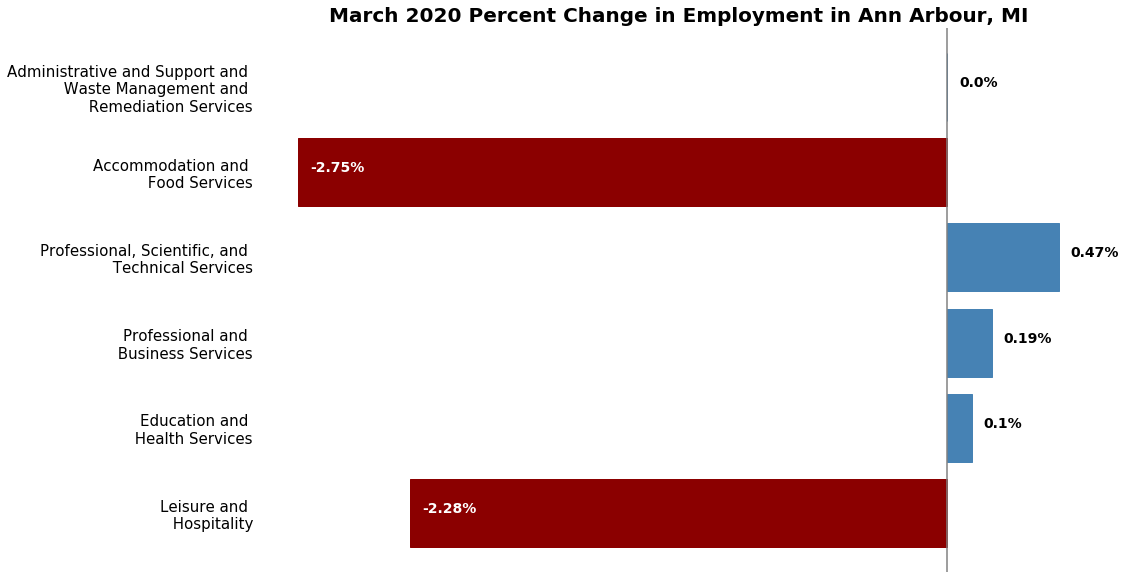

In [6]:
# Building the visualization

# Defining the figure and axes
fig, ax = plt.subplots(1, figsize = (15,10));

# Creating the bar plot
plt.barh(position, bar_heights, bar_width);

# Adding a line to indicate 0 percent change, which is baseline
plt.axvline(x=0, color='grey', linestyle='-');

# Title
plt.title('March 2020 Percent Change in Employment in Ann Arbour, MI', fontsize = 20,  fontweight='bold');

# Setting the x labels
plt.yticks([x for x in range(len(bar_heights))], ['Leisure and \n Hospitality', 
                                                  'Education and \n Health Services', 
                                                  'Professional and \n Business Services', 
                                                  'Professional, Scientific, and \n Technical Services', 
                                                  'Accommodation and \n Food Services',
                                                  'Administrative and Support and \n Waste Management and \n Remediation Services'],
          fontsize = 15);

# Setting the y ticks font size
plt.xticks(fontsize=15);

# Removing spines
for spine in plt.gca().spines.values():
    spine.set_visible(False);
    
# Removing ticks    
plt.tick_params(top=False, bottom=False, left=False, right=False, labelbottom=False);

# Labeling bars directly
for i, val in enumerate(bar_heights):
    if val < 0:
        ax.text(val+.05, i, str(round(val, 2))+'%', color = 'white', fontsize=14, fontweight='bold');
    else:
        ax.text(val+.05, i, str(round(val, 2))+'%', fontsize=14, fontweight='bold');
    
# Coloring based on the y value
for i, val in enumerate(bar_heights):
    if val < 0:
        ax.get_children()[i].set_color('darkred')
    else:
        ax.get_children()[i].set_color('steelblue')

## Conclusion

The accommodation and food services as well as the Leisure and hospitality industries have shown the greatest percent decrease in jobs for March 2020 in Ann Arbour, MI, with a 2.75 and 2.28 percent decrease in jobs, respectively. This makes sense as many restaurants are forced to close based on social distancing protocols, and hardly anyone is traveling.

Other industries I looked at showed either no change or a positive change. I was surprised by this at first, but after considering it, most professional services are becoming more information-based, and many people are still able to work from home in these industries.

## Albert Cairo's Principals of Data Visualization

**Truthfulness:** no change was made to the raw data. Percent change was used to normalize the data and provide a more accurate representation of the change in jobs.

**Beauty:** I chose to use colors that worked well together, and made sure the aesthetic of the image was pleasing to the eye

**Functionality:** I directly labeled the bars to increase comprehension, as well as eliminated unnecessary "chart junk" like ticks and spines

**Insightfulness:** Calculating the percent change in jobs for each industry and combining them in a simple bar chart provided a unique visual of which industries are likely being affected by COVID-19